This is a notebook with data from a bike rental. It contains the different types of bikes, the different type of members and the duration of the bike rental. Also there are geographical data, the starting point and the ending point.

For starters, we will focus on the time data and how we can clean the dataframe in some way.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"...\202110-divvy-tripdata.csv")

In [3]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member


# Visualization (part 1)

It's always better to visualize your data!

In [4]:
bikes = data['rideable_type'].unique()
for i in range(len(bikes)):
    print(f'The number of {bikes[i]} is {data.groupby("rideable_type").size()[bikes[i]]}')

The number of electric_bike is 292203
The number of docked_bike is 22884
The number of classic_bike is 316139


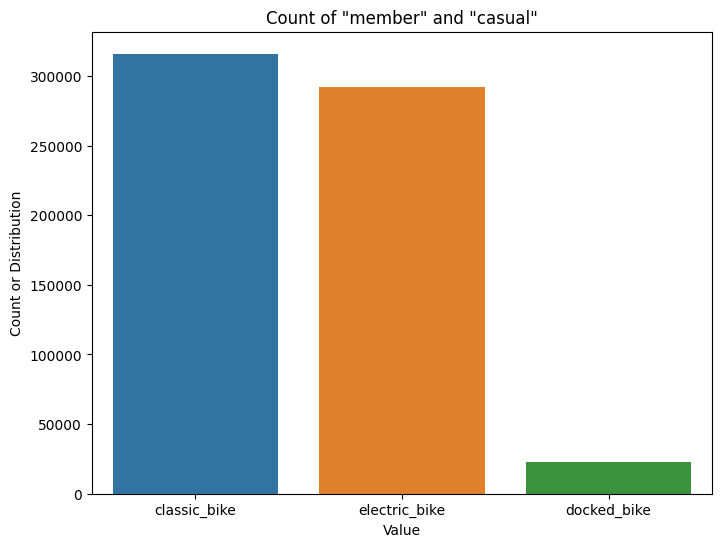

In [5]:
value_counts = data['rideable_type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x = value_counts.index, y=value_counts.values)
plt.title('Count of "member" and "casual"')
plt.xlabel("Value")
plt.ylabel('Count or Distribution')
plt.show()

In [6]:
members = data['member_casual'].unique()
for i in range(len(members)):
    print(f'The number of {members[i]} is {data.groupby("member_casual").size()[members[i]]}')

The number of member is 373984
The number of casual is 257242


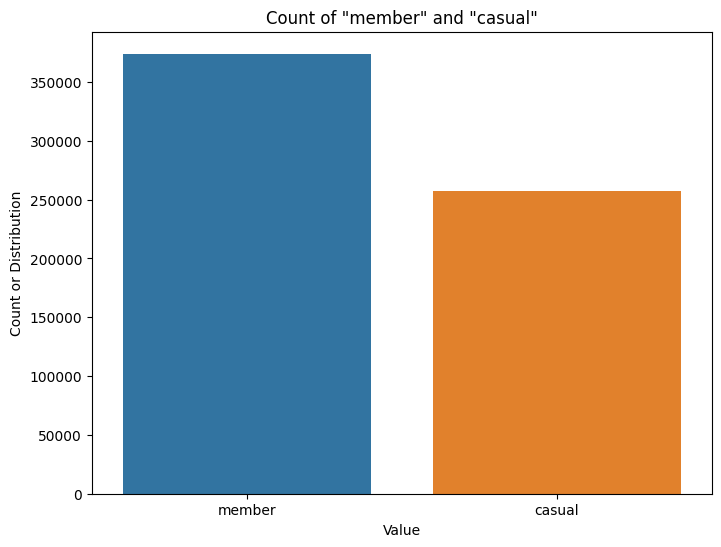

In [7]:
value_counts = data['member_casual'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x = value_counts.index, y=value_counts.values)
plt.title('Count of "member" and "casual"')
plt.xlabel("Value")
plt.ylabel('Count or Distribution')
plt.show()

We can see that members are a lot more than causals!

# Processing

In [8]:
data['started_at'][0]

'2021-10-22 12:46:42'

In [9]:
data['started_at'][0][:10]

'2021-10-22'

In [10]:
data['started_at'][0][11:]

'12:46:42'

Another step we could make is to divide the start date and start time into two new columns. The same could be done for the stop column.

In [11]:
data[['start_date', 'start_time']] = data['started_at'].str.split(' ', n=1, expand=True)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47


In [12]:
#Let's do the same for the end times
data[['end_date', 'end_time']] = data['ended_at'].str.split(' ', n=1, expand=True)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15


Of course this can be done in a more simple way!

In [13]:
data['datetime_column'] = pd.to_datetime(data['started_at'], format='%Y-%m-%d %H:%M:%S')
data['start_date'] = data['datetime_column'].dt.strftime('%Y-%m-%d')
data['start_time'] = data['datetime_column'].dt.strftime('%H:%M:%S')
del data['datetime_column']

data['datetime_column'] = pd.to_datetime(data['ended_at'], format='%Y-%m-%d %H:%M:%S')
data['end_date'] = data['datetime_column'].dt.strftime('%Y-%m-%d')
data['end_time'] = data['datetime_column'].dt.strftime('%H:%M:%S')
del data['datetime_column']
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15


How about checking the duration of each ride?

In [14]:
data['dummy_start_time'] = pd.to_datetime(data['start_time'], format='%H:%M:%S')
data['dummy_end_time'] = pd.to_datetime(data['end_time'], format='%H:%M:%S')
data['duration_seconds'] = (data['dummy_end_time'] - data['dummy_start_time']).dt.total_seconds()
del data['dummy_start_time'], data['dummy_end_time']
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,duration_seconds
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50,188.0
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14,97.0
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26,467.0
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03,75.0
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25,1340.0
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02,1354.0
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43,333.0
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15,328.0


How about in minutes?

In [15]:
data['duration_timedelta'] = pd.to_timedelta(data['duration_seconds'], unit='s')

# Convert timedelta to datetime.timedelta representing minutes
data['duration_time'] = data['duration_timedelta'].astype(str).str.split().str[-1]
del data['duration_timedelta']
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,duration_seconds,duration_time
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50,188.0,00:03:08
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14,97.0,00:01:37
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26,467.0,00:07:47
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03,75.0,00:01:15
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10,496.0,00:08:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25,1340.0,00:22:20
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02,1354.0,00:22:34
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43,333.0,00:05:33
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15,328.0,00:05:28


In [16]:
# Out of curiosity, let's check the maximum time someone rented a bike.
# Convert 'duration_minutes' to numeric minutes
data['duration_minutes_numeric'] = data['duration_time'].str.split(':').apply(
    lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) / 60
)

# Find the index of the maximum value in 'duration_minutes_numeric'
max_index = data['duration_minutes_numeric'].idxmax()
del data['duration_minutes_numeric']
print(f"The index of the maximum value in 'duration_minutes' column is {max_index}")

The index of the maximum value in 'duration_minutes' column is 210095


In [17]:
data.loc[210095]

ride_id                          D094528F715AF7BC
rideable_type                         docked_bike
started_at                    2021-10-10 11:38:28
ended_at                      2021-10-13 11:35:52
start_station_name    Halsted St & 18th St (Temp)
start_station_id                            13099
end_station_name        Clark St & Ida B Wells Dr
end_station_id                       TA1305000009
start_lat                               41.858371
start_lng                              -87.646388
end_lat                                 41.875933
end_lng                                -87.630585
member_casual                              casual
start_date                             2021-10-10
start_time                               11:38:28
end_date                               2021-10-13
end_time                                 11:35:52
duration_seconds                           -156.0
duration_time                           +23:57:24
Name: 210095, dtype: object

The duration_seconds column contains a negative value. We all know that there are no negative seconds. So we need to ensure that our results will be correct and the method we implemented before contains wrong results.

In [18]:
data['dummy_start_time'] = pd.to_datetime(data['started_at'])
data['dummy_end_time'] = pd.to_datetime(data['ended_at'])
data['time_difference_seconds'] = (data['dummy_end_time'] - data['dummy_start_time']).dt.total_seconds()
del data['dummy_start_time'], data['dummy_end_time']
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,duration_seconds,duration_time,time_difference_seconds
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50,188.0,00:03:08,188.0
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14,97.0,00:01:37,97.0
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26,467.0,00:07:47,467.0
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03,75.0,00:01:15,75.0
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10,496.0,00:08:16,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25,1340.0,00:22:20,1340.0
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02,1354.0,00:22:34,1354.0
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43,333.0,00:05:33,333.0
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15,328.0,00:05:28,328.0


Let's check again the previous error index.

In [19]:
# Delete the previous difference in minutes because it was wrong
del data['duration_time'], data['duration_seconds']

# Repeat the previous step with the new and correct column
data['duration_minutes'] = pd.to_timedelta(data['time_difference_seconds'], unit='s')

data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,time_difference_seconds,duration_minutes
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50,188.0,0 days 00:03:08
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14,97.0,0 days 00:01:37
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26,467.0,0 days 00:07:47
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03,75.0,0 days 00:01:15
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10,496.0,0 days 00:08:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25,1340.0,0 days 00:22:20
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02,1354.0,0 days 00:22:34
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43,333.0,0 days 00:05:33
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15,328.0,0 days 00:05:28


In [20]:
# Convert 'duration_minutes' to numeric minutes
data['duration_minutes_numeric'] = pd.to_timedelta(data['duration_minutes'])

# Find the index of the maximum value in 'duration_minutes_numeric'
max_index = data['duration_minutes_numeric'].idxmax()
del data['duration_minutes_numeric']
print(f"The index of the maximum value in 'duration_minutes' column is {max_index}")

The index of the maximum value in 'duration_minutes' column is 360554


First let's check the previous index.

In [21]:
data.loc[210095]

ride_id                               D094528F715AF7BC
rideable_type                              docked_bike
started_at                         2021-10-10 11:38:28
ended_at                           2021-10-13 11:35:52
start_station_name         Halsted St & 18th St (Temp)
start_station_id                                 13099
end_station_name             Clark St & Ida B Wells Dr
end_station_id                            TA1305000009
start_lat                                    41.858371
start_lng                                   -87.646388
end_lat                                      41.875933
end_lng                                     -87.630585
member_casual                                   casual
start_date                                  2021-10-10
start_time                                    11:38:28
end_date                                    2021-10-13
end_time                                      11:35:52
time_difference_seconds                       259044.0
duration_m

Now the correct one.

In [22]:
data.loc[360554]

ride_id                       A310C7270FD730B6
rideable_type                      docked_bike
started_at                 2021-10-02 18:35:36
ended_at                   2021-10-31 01:00:37
start_station_name              Dusable Harbor
start_station_id                  KA1503000064
end_station_name             Wells St & Elm St
end_station_id                    KA1504000135
start_lat                            41.886976
start_lng                           -87.612813
end_lat                              41.903222
end_lng                             -87.634324
member_casual                           casual
start_date                          2021-10-02
start_time                            18:35:36
end_date                            2021-10-31
end_time                              01:00:37
time_difference_seconds              2442301.0
duration_minutes              28 days 06:25:01
Name: 360554, dtype: object

So the winner is a casual member with a docked bike, that kept it for 28 days, 6 hours, 25 minutes and 1 second!

# Visualization (part 2)

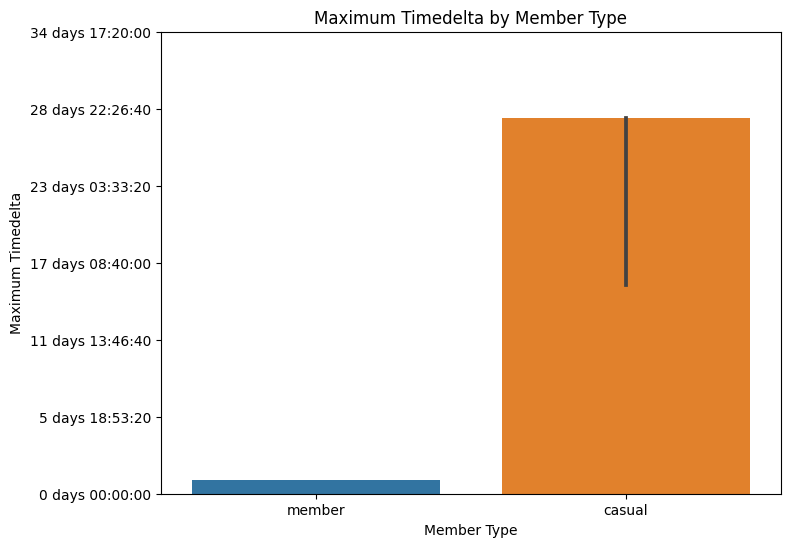

In [23]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='member_casual', y='time_difference_seconds', data=data, estimator=max)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

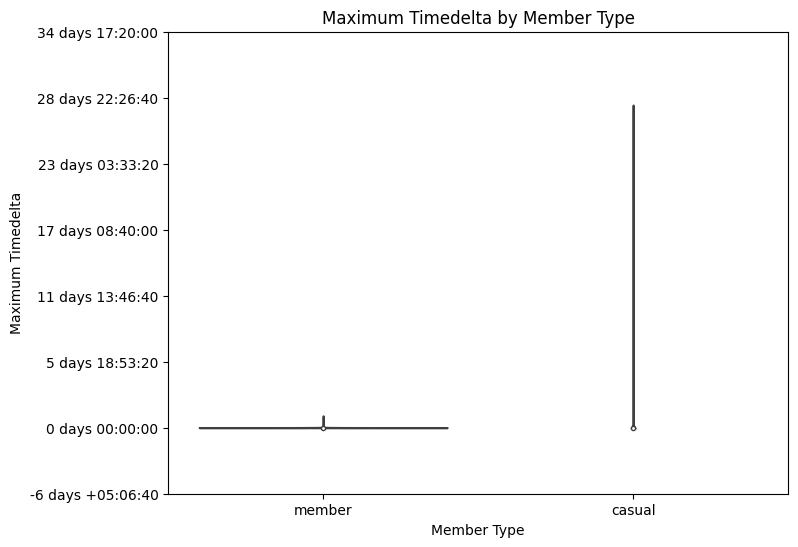

In [24]:
# Create a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x='member_casual', y='time_difference_seconds', data=data)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

We need to find the outliers, or else our plot will look horrible. Let's set the threshol to 1 day.

In [25]:
data['timedeltas'] = pd.to_timedelta(data['duration_minutes'])

one_day_timedelta = pd.Timedelta(days=1)
# Count values under 1 day
values_under_1_day = (data['timedeltas'] < one_day_timedelta).sum()

# Count values above or equal to 1 day
values_above_1_day = (data['timedeltas'] >= one_day_timedelta).sum()

print(f"Values under 1 day: {values_under_1_day}")
print(f"Values above or equal to 1 day: {values_above_1_day}")

Values under 1 day: 630771
Values above or equal to 1 day: 455


For starters, we could create a copy of the original dataframe. Then we could remove the 455 outliers and see the new bar and violin plot.

In [26]:
copy_data = data.copy()

In [27]:
copy_data = copy_data[copy_data['timedeltas'] < one_day_timedelta]
copy_data = copy_data.reset_index(drop=True)
copy_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,time_difference_seconds,duration_minutes,timedeltas
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50,188.0,0 days 00:03:08,0 days 00:03:08
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14,97.0,0 days 00:01:37,0 days 00:01:37
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26,467.0,0 days 00:07:47,0 days 00:07:47
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03,75.0,0 days 00:01:15,0 days 00:01:15
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10,496.0,0 days 00:08:16,0 days 00:08:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630766,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25,1340.0,0 days 00:22:20,0 days 00:22:20
630767,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02,1354.0,0 days 00:22:34,0 days 00:22:34
630768,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43,333.0,0 days 00:05:33,0 days 00:05:33
630769,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15,328.0,0 days 00:05:28,0 days 00:05:28


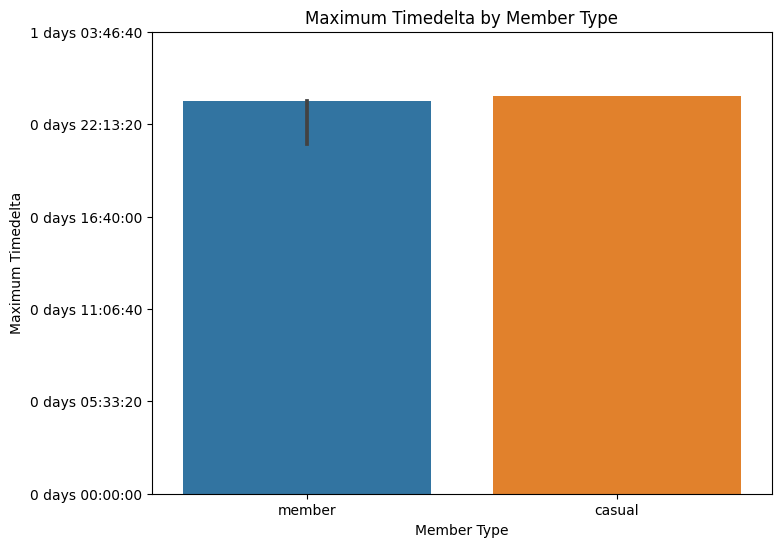

In [28]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='member_casual', y='time_difference_seconds', data=copy_data, estimator=max)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

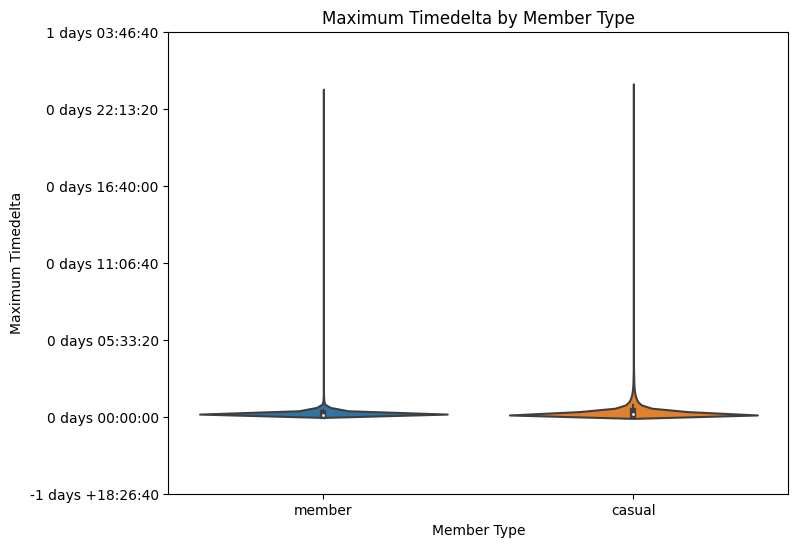

In [29]:
# Create a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x='member_casual', y='time_difference_seconds', data=copy_data)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

Not very good, either. How about normalizing?

In [30]:
casual_times_list = data.loc[data['member_casual'] == 'casual', 'time_difference_seconds'].tolist()
len(casual_times_list)

257242

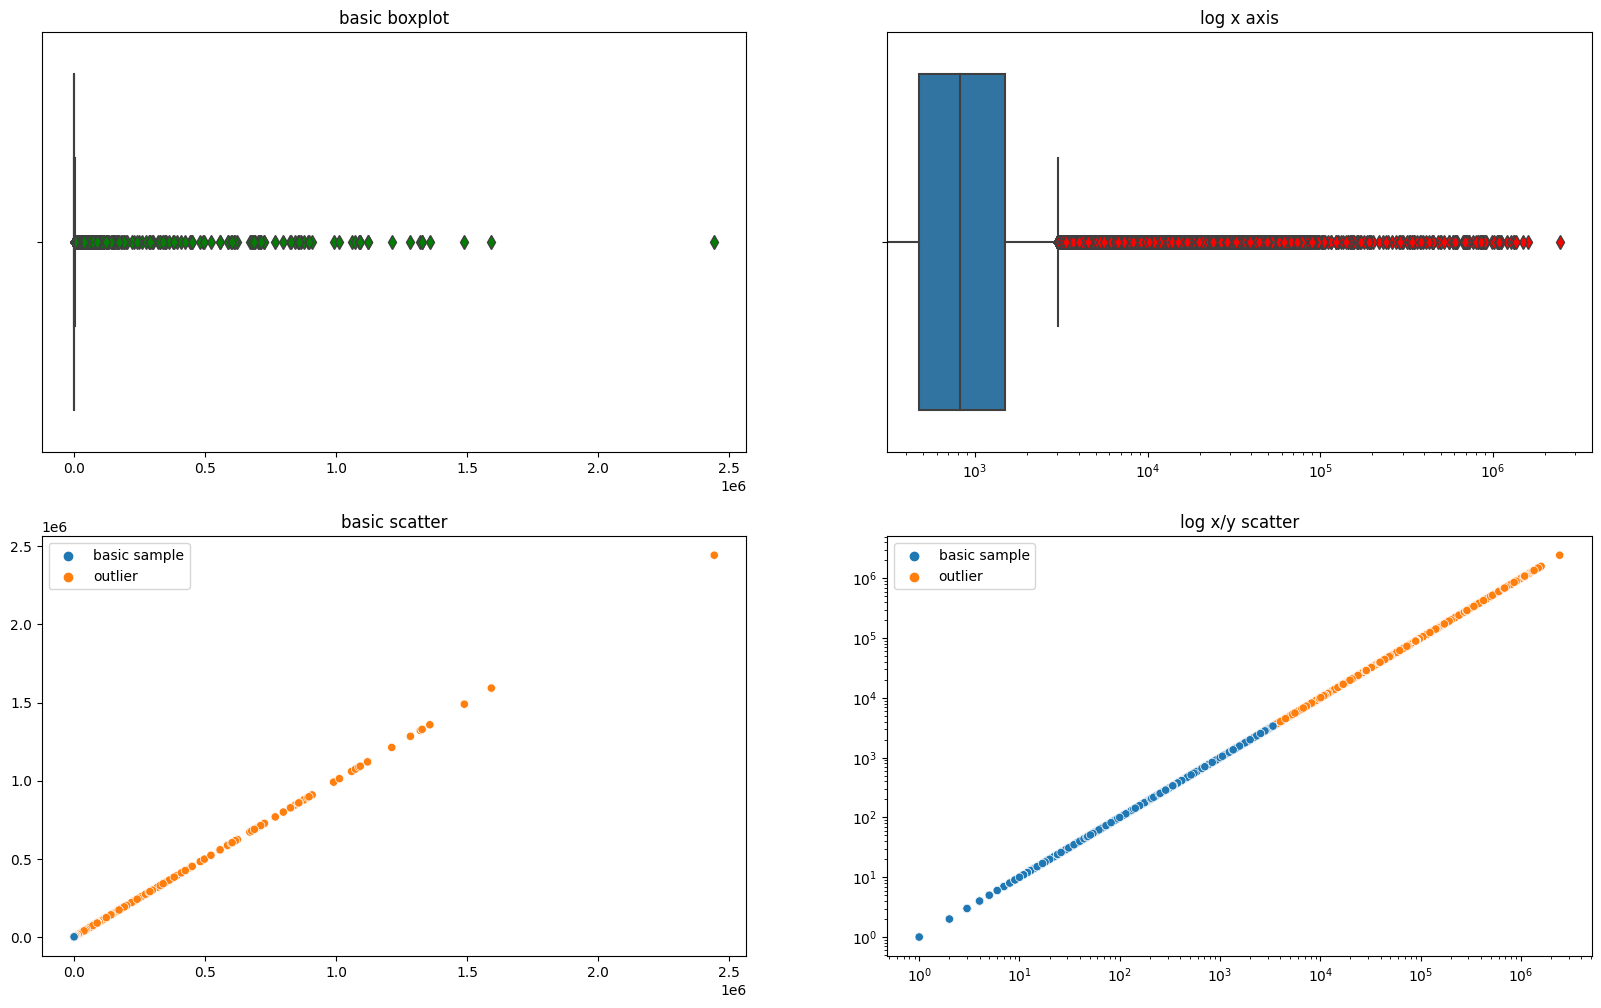

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('basic boxplot')
sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='green', markersize=7))
plt.subplot(2,2,2)
plt.title('log x axis')
b = sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='red', markersize=7))
b.set_xscale('log')
plt.subplot(2,2,3)
plt.title('basic scatter')
hue = ['outlier' if i > 3600 else 'basic sample' for i in casual_times_list]
sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
plt.subplot(2,2,4)
plt.title('log x/y scatter')
s = sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
s.set_xscale('log')
s.set_yscale('log')
plt.show()

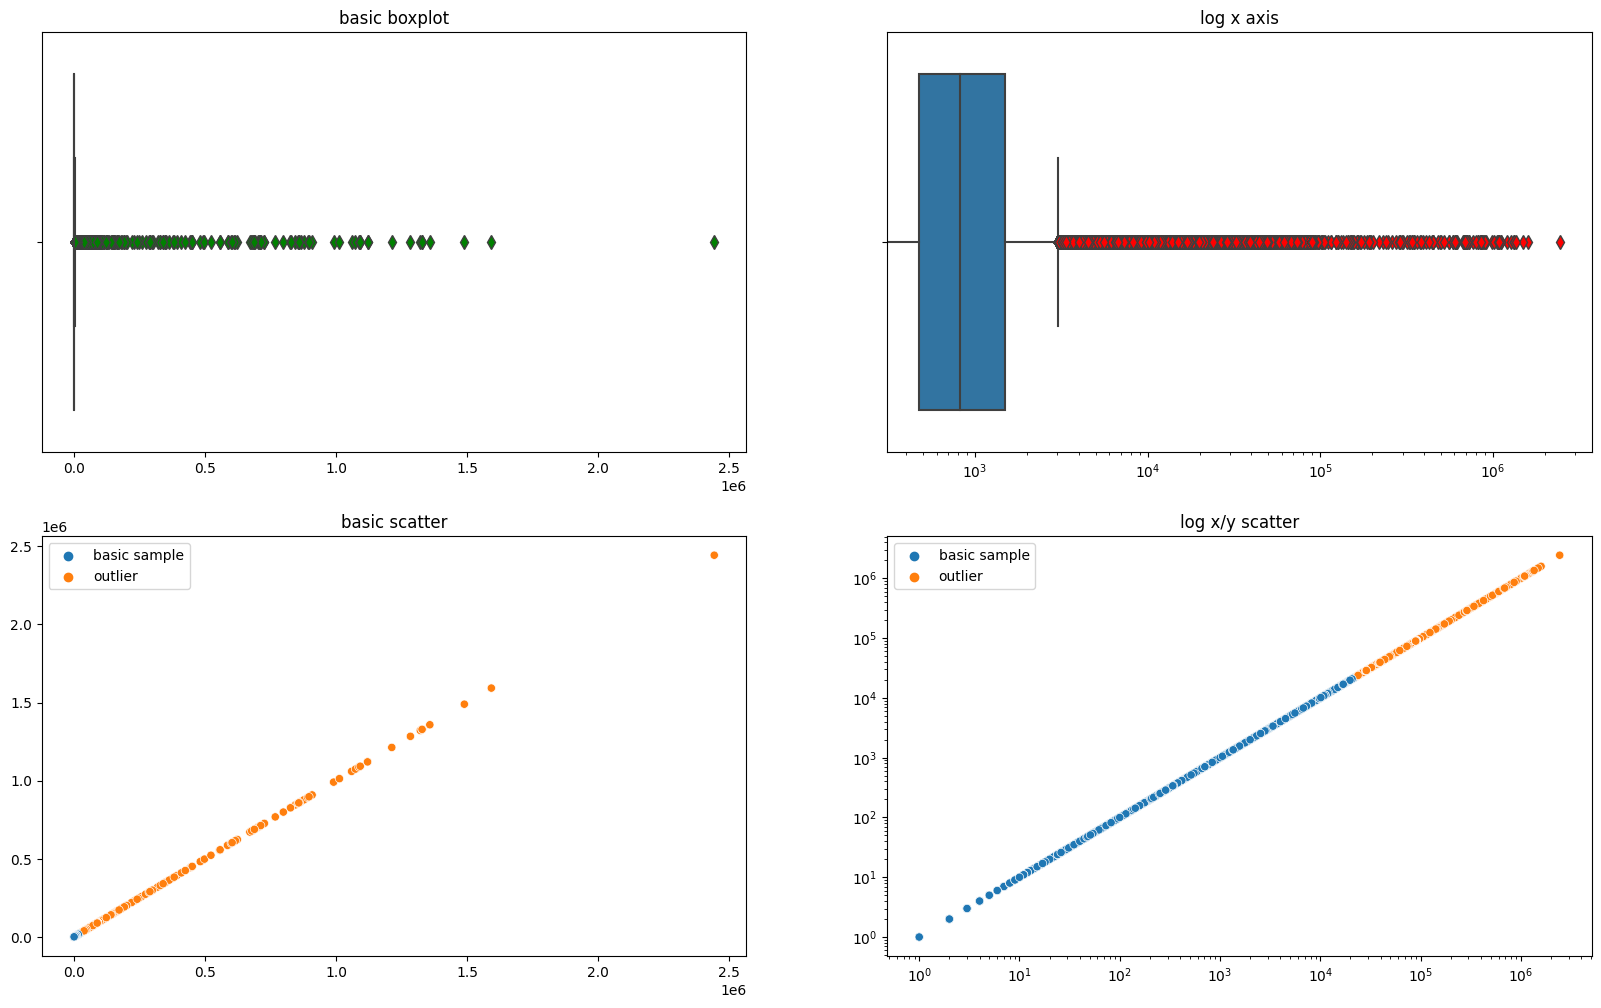

In [32]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('basic boxplot')
sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='green', markersize=7))
plt.subplot(2,2,2)
plt.title('log x axis')
b = sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='red', markersize=7))
b.set_xscale('log')
plt.subplot(2,2,3)
plt.title('basic scatter')
hue = ['outlier' if i > 21600 else 'basic sample' for i in casual_times_list]
sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
plt.subplot(2,2,4)
plt.title('log x/y scatter')
s = sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
s.set_xscale('log')
s.set_yscale('log')
plt.show()

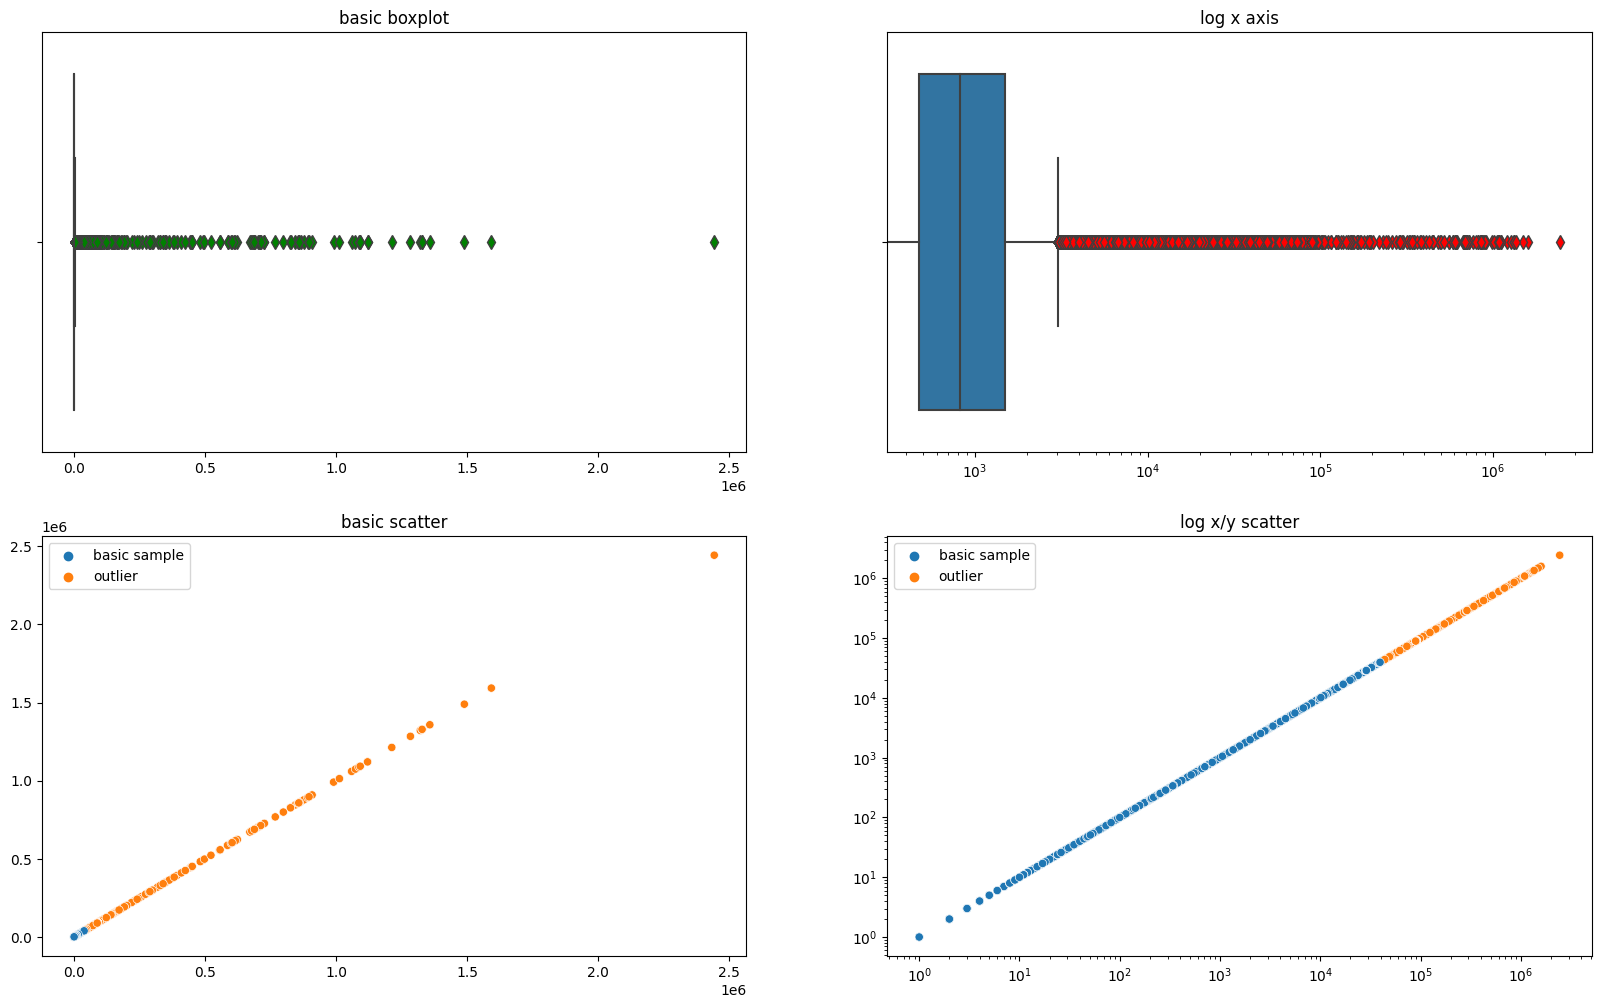

In [33]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('basic boxplot')
sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='green', markersize=7))
plt.subplot(2,2,2)
plt.title('log x axis')
b = sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='red', markersize=7))
b.set_xscale('log')
plt.subplot(2,2,3)
plt.title('basic scatter')
hue = ['outlier' if i > 43200 else 'basic sample' for i in casual_times_list]
sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
plt.subplot(2,2,4)
plt.title('log x/y scatter')
s = sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
s.set_xscale('log')
s.set_yscale('log')
plt.show()

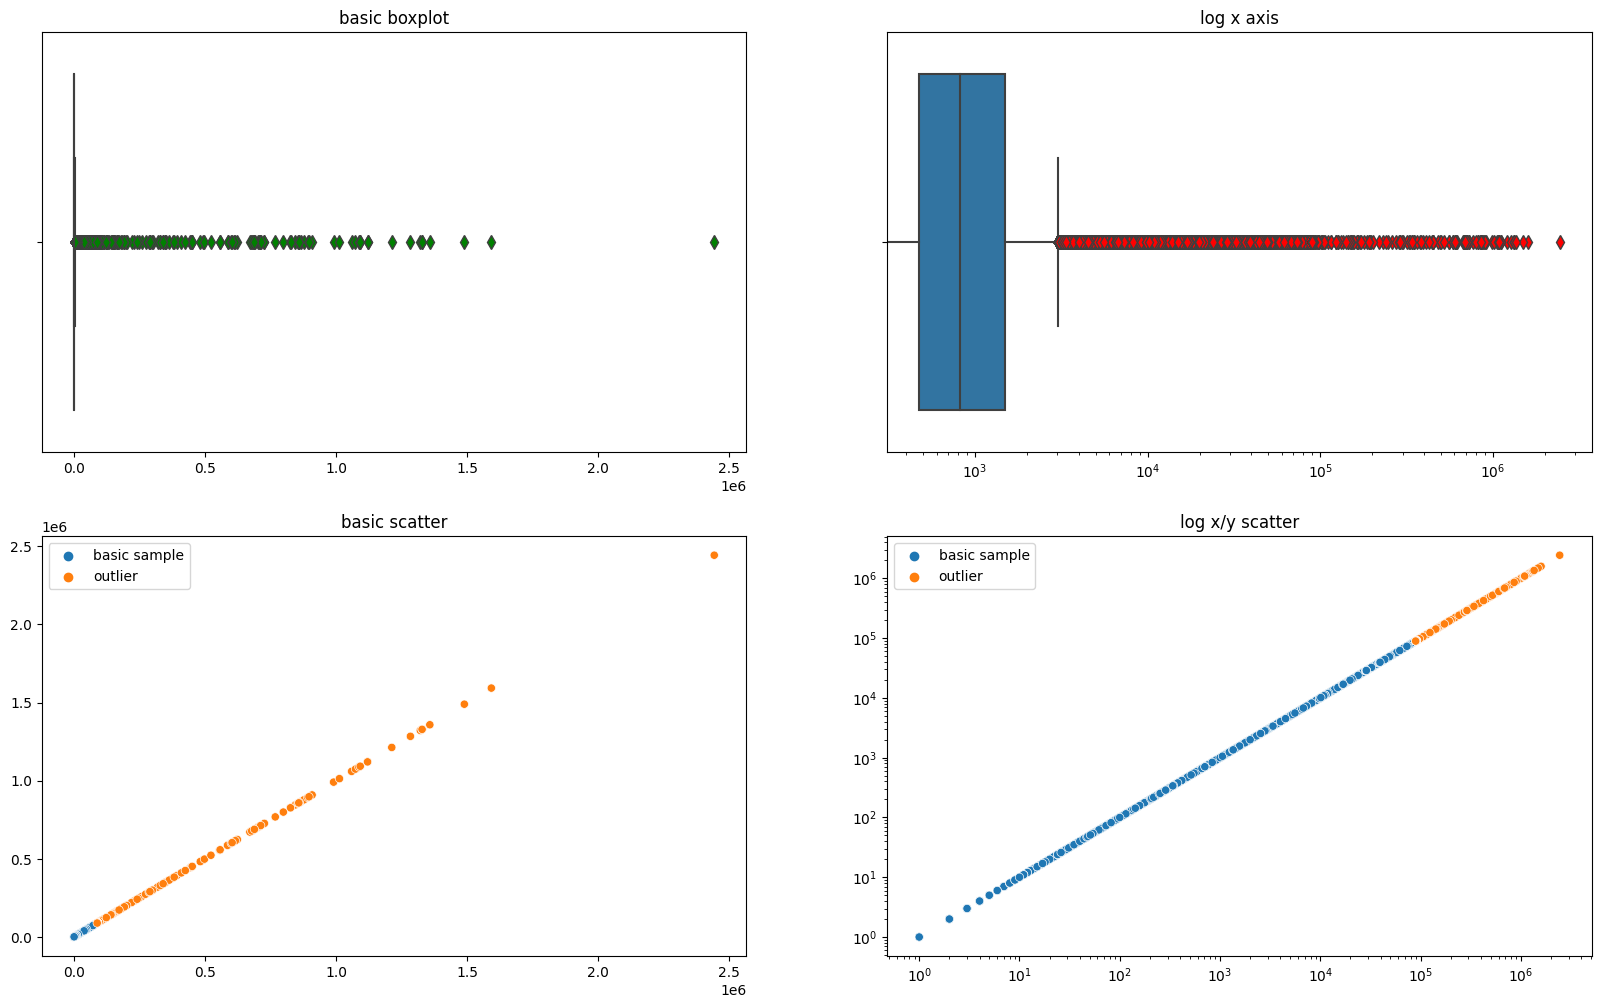

In [34]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('basic boxplot')
sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='green', markersize=7))
plt.subplot(2,2,2)
plt.title('log x axis')
b = sns.boxplot(x=casual_times_list, flierprops=dict(markerfacecolor='red', markersize=7))
b.set_xscale('log')
plt.subplot(2,2,3)
plt.title('basic scatter')
hue = ['outlier' if i > 86400 else 'basic sample' for i in casual_times_list]
sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
plt.subplot(2,2,4)
plt.title('log x/y scatter')
s = sns.scatterplot(x=casual_times_list, y=casual_times_list, hue=hue)
s.set_xscale('log')
s.set_yscale('log')
plt.show()

We can try some Statistical Analysis for the outliers.

In [35]:
def find_ouliers(dataframe):
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    IQR = q3-q1
    outliers = dataframe[((dataframe<(q1-1.5*IQR)) | (dataframe>(q3+1.5*IQR)))]
    return outliers

In [36]:
outliers = find_ouliers(data['time_difference_seconds'])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

number of outliers: 45459
max outlier value: 2442301.0
min outlier value: 2264.0


In [37]:
outliers

25        2563.0
38        2309.0
76        6097.0
84        7587.0
86        2547.0
           ...  
631189    2315.0
631193    4509.0
631198    2542.0
631209    6783.0
631219    5592.0
Name: time_difference_seconds, Length: 45459, dtype: float64

In [38]:
# Let's drop them
def drop_outliers(dataframe):
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    IQR = q3-q1
    not_outliers = dataframe[~((dataframe<(q1-1.5*IQR)) | (dataframe>(q3+1.5*IQR)))]
    outliers_dropped = outliers.dropna().reset_index()
    return outliers_dropped

In [39]:
new_data = drop_outliers(data['time_difference_seconds'])

In [40]:
new_data

,index,time_difference_seconds
0,25,2563.0
1,38,2309.0
2,76,6097.0
3,84,7587.0
4,86,2547.0
...,...,...
45454,631189,2315.0
45455,631193,4509.0
45456,631198,2542.0
45457,631209,6783.0


As you can see, the new dataframe, returned the kept data, with the corresponding indices and the values. We can tranform the index column to a list and keep those indices from the original dataframe.

In [41]:
copy_data = data.copy()

In [42]:
indices_to_keep = new_data['index'].tolist()
copy_data = copy_data.loc[indices_to_keep]

In [43]:
copy_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,time_difference_seconds,duration_minutes,timedeltas
25,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,2021-10-05,10:56:05,2021-10-05,11:38:48,2563.0,0 days 00:42:43,0 days 00:42:43
38,9B4E30A4D1BFCC5C,electric_bike,2021-10-02 10:50:48,2021-10-02 11:29:17,NaN,NaN,NaN,NaN,41.920000,-87.680000,41.920000,-87.650000,member,2021-10-02,10:50:48,2021-10-02,11:29:17,2309.0,0 days 00:38:29,0 days 00:38:29
76,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,2021-10-16,10:19:43,2021-10-16,12:01:20,6097.0,0 days 01:41:37,0 days 01:41:37
84,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,2021-10-24,11:03:34,2021-10-24,13:10:01,7587.0,0 days 02:06:27,0 days 02:06:27
86,AE30EA6182E4A38D,electric_bike,2021-10-06 11:58:08,2021-10-06 12:40:35,NaN,NaN,NaN,NaN,41.950000,-87.700000,41.970000,-87.690000,member,2021-10-06,11:58:08,2021-10-06,12:40:35,2547.0,0 days 00:42:27,0 days 00:42:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631189,6D871495540CCBE6,classic_bike,2021-10-03 22:59:07,2021-10-03 23:37:42,Michigan Ave & Lake St,TA1305000011,Michigan Ave & 8th St,623,41.886024,-87.624117,41.872773,-87.623981,casual,2021-10-03,22:59:07,2021-10-03,23:37:42,2315.0,0 days 00:38:35,0 days 00:38:35
631193,2403A19220DA3196,classic_bike,2021-10-08 19:45:11,2021-10-08 21:00:20,Michigan Ave & Lake St,TA1305000011,Michigan Ave & 8th St,623,41.886024,-87.624117,41.872773,-87.623981,casual,2021-10-08,19:45:11,2021-10-08,21:00:20,4509.0,0 days 01:15:09,0 days 01:15:09
631198,BE5EEC97786E056C,docked_bike,2021-10-10 11:02:41,2021-10-10 11:45:03,Halsted St & 21st St,13162,Michigan Ave & 8th St,623,41.853780,-87.646603,41.872773,-87.623981,casual,2021-10-10,11:02:41,2021-10-10,11:45:03,2542.0,0 days 00:42:22,0 days 00:42:22
631209,9382B15B6AE47737,docked_bike,2021-10-14 16:31:17,2021-10-14 18:24:20,Canal St & Madison St,13341,Rush St & Hubbard St,KA1503000044,41.882091,-87.639833,41.890173,-87.626185,casual,2021-10-14,16:31:17,2021-10-14,18:24:20,6783.0,0 days 01:53:03,0 days 01:53:03


Let's try plotting again.

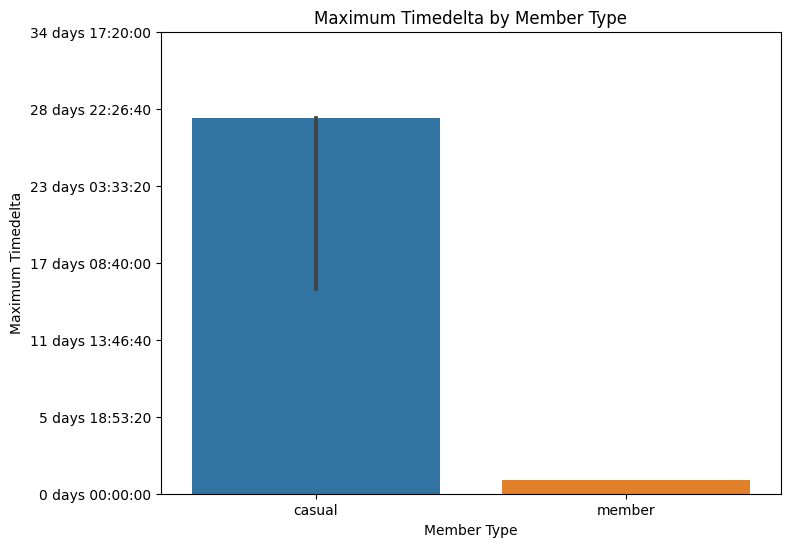

In [44]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='member_casual', y='time_difference_seconds', data=copy_data, estimator=max)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

It is clear that the duration of usage from the casuals is a bigger than the members!

# Visualization (part 3)


How about plotting the duration with the different kind of bikes?

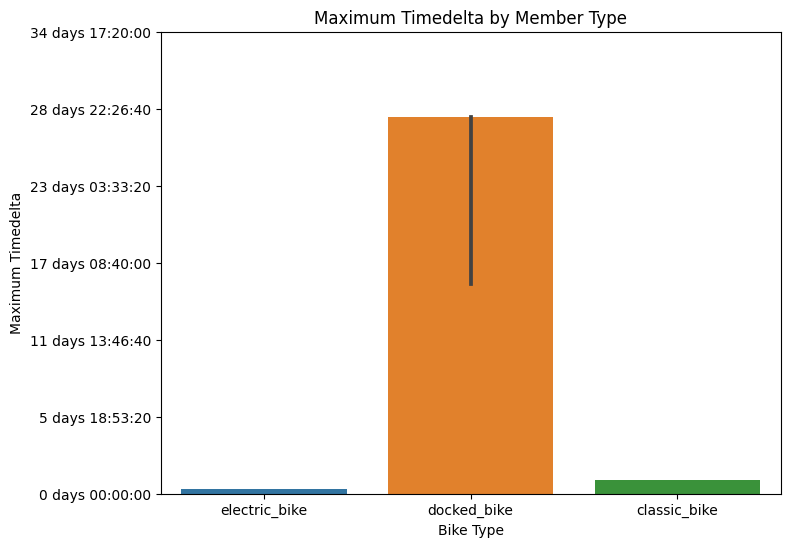

In [45]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='rideable_type', y='time_difference_seconds', data=data, estimator=max)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

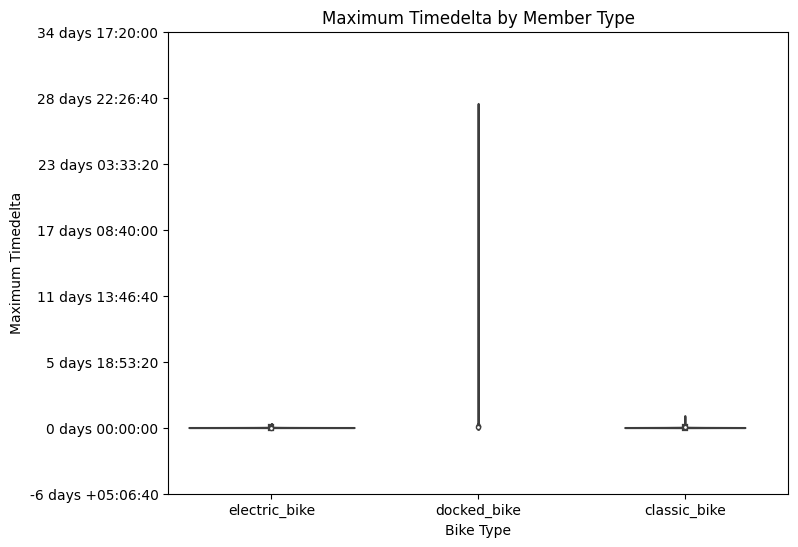

In [46]:
# Create a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x='rideable_type', y='time_difference_seconds', data=data)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

Let's use the filtered data.

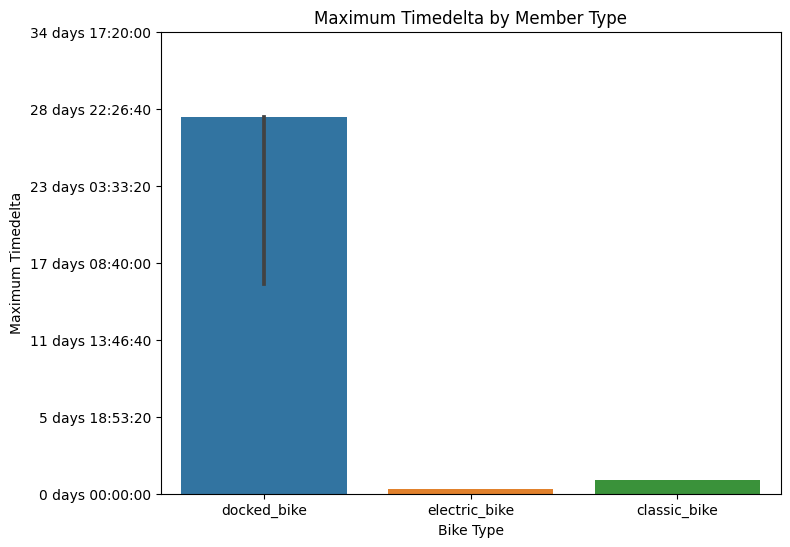

In [47]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='rideable_type', y='time_difference_seconds', data=copy_data, estimator=max)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

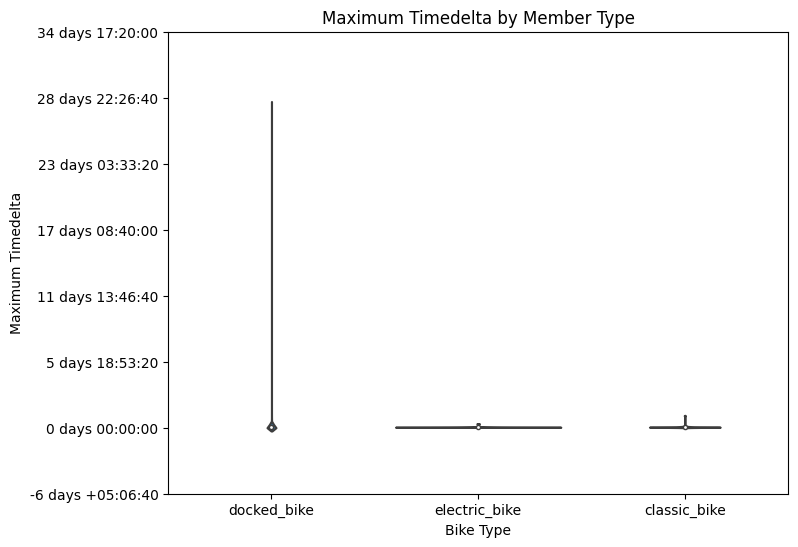

In [48]:
# Create a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x='rideable_type', y='time_difference_seconds', data=copy_data)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

In [49]:
data1 = data.copy()

In [50]:
data1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,time_difference_seconds,duration_minutes,timedeltas
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member,2021-10-22,12:46:42,2021-10-22,12:49:50,188.0,0 days 00:03:08,0 days 00:03:08
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member,2021-10-21,09:12:37,2021-10-21,09:14:14,97.0,0 days 00:01:37,0 days 00:01:37
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member,2021-10-16,16:28:39,2021-10-16,16:36:26,467.0,0 days 00:07:47,0 days 00:07:47
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member,2021-10-16,16:17:48,2021-10-16,16:19:03,75.0,0 days 00:01:15,0 days 00:01:15
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member,2021-10-20,23:17:54,2021-10-20,23:26:10,496.0,0 days 00:08:16,0 days 00:08:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual,2021-10-14,21:45:05,2021-10-14,22:07:25,1340.0,0 days 00:22:20,0 days 00:22:20
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual,2021-10-02,15:28:28,2021-10-02,15:51:02,1354.0,0 days 00:22:34,0 days 00:22:34
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member,2021-10-08,16:47:10,2021-10-08,16:52:43,333.0,0 days 00:05:33,0 days 00:05:33
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member,2021-10-08,07:49:47,2021-10-08,07:55:15,328.0,0 days 00:05:28,0 days 00:05:28


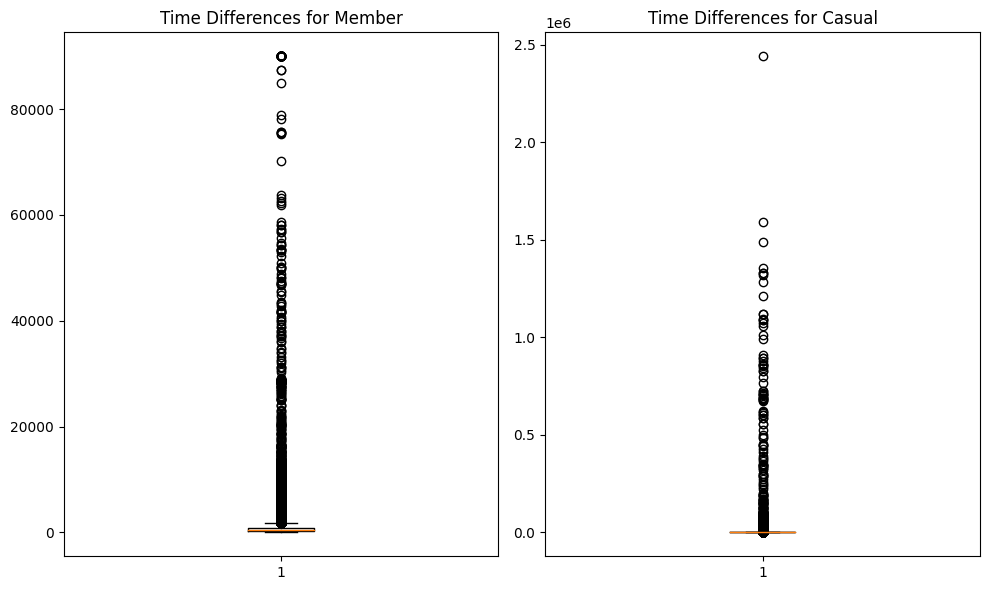

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Separate the data by category
member_data = data1[data1['member_casual'] == 'member']
casual_data = data1[data1['member_casual'] == 'casual']

# Visualize the time differences for each category using box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(member_data['time_difference_seconds'])
plt.title('Time Differences for Member')

plt.subplot(1, 2, 2)
plt.boxplot(casual_data['time_difference_seconds'])
plt.title('Time Differences for Casual')

plt.tight_layout()
plt.show()

# Calculate Z-scores and identify outliers (e.g., Z-score > 2)
member_z_scores = np.abs(stats.zscore(member_data['time_difference_seconds']))
casual_z_scores = np.abs(stats.zscore(casual_data['time_difference_seconds']))

member_outliers = member_data[member_z_scores > 2]
casual_outliers = casual_data[casual_z_scores > 2]

In [52]:
member_outliers

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,time_difference_seconds,duration_minutes,timedeltas
87,22725A1E1CAE94B6,electric_bike,2021-10-30 12:42:37,2021-10-30 13:51:13,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.950000,-87.660000,member,2021-10-30,12:42:37,2021-10-30,13:51:13,4116.0,0 days 01:08:36,0 days 01:08:36
270,30248124D1FA112E,electric_bike,2021-10-11 12:40:29,2021-10-11 14:30:50,NaN,NaN,NaN,NaN,41.930000,-87.720000,41.970000,-87.760000,member,2021-10-11,12:40:29,2021-10-11,14:30:50,6621.0,0 days 01:50:21,0 days 01:50:21
345,F1A6E9746D81A2B8,electric_bike,2021-10-01 15:01:26,2021-10-01 17:22:23,NaN,NaN,NaN,NaN,41.890000,-87.630000,41.890000,-87.620000,member,2021-10-01,15:01:26,2021-10-01,17:22:23,8457.0,0 days 02:20:57,0 days 02:20:57
542,F9404C397C476DEB,electric_bike,2021-10-05 17:28:54,2021-10-05 20:36:32,NaN,NaN,NaN,NaN,41.890000,-87.630000,41.890000,-87.630000,member,2021-10-05,17:28:54,2021-10-05,20:36:32,11258.0,0 days 03:07:38,0 days 03:07:38
2007,57BF090DF52E7C6A,electric_bike,2021-10-27 18:39:38,2021-10-27 20:55:51,NaN,NaN,NaN,NaN,41.890000,-87.630000,41.890000,-87.630000,member,2021-10-27,18:39:38,2021-10-27,20:55:51,8173.0,0 days 02:16:13,0 days 02:16:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630384,D026EC75AC3A02BA,classic_bike,2021-10-04 23:34:05,2021-10-05 01:09:40,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,Campbell Ave & Montrose Ave,15623,41.932588,-87.636427,41.961526,-87.691165,member,2021-10-04,23:34:05,2021-10-05,01:09:40,5735.0,0 days 01:35:35,0 days 01:35:35
630609,09799EE08CC07669,electric_bike,2021-10-10 07:27:17,2021-10-10 10:29:34,Michigan Ave & Washington St,13001,Michigan Ave & 8th St,623,41.883893,-87.624233,41.872451,-87.623874,member,2021-10-10,07:27:17,2021-10-10,10:29:34,10937.0,0 days 03:02:17,0 days 03:02:17
630696,F79988E8D31EBA79,classic_bike,2021-10-09 15:59:05,2021-10-09 17:39:27,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,member,2021-10-09,15:59:05,2021-10-09,17:39:27,6022.0,0 days 01:40:22,0 days 01:40:22
630847,0E24656AC00B7A5F,electric_bike,2021-10-10 09:19:17,2021-10-10 10:31:39,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961602,-87.691148,41.961511,-87.691195,member,2021-10-10,09:19:17,2021-10-10,10:31:39,4342.0,0 days 01:12:22,0 days 01:12:22


In [53]:
casual_outliers

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,time_difference_seconds,duration_minutes,timedeltas
6929,9789702443C29FCB,classic_bike,2021-10-19 19:20:32,2021-10-20 20:20:13,Clark St & Grace St,TA1307000127,NaN,NaN,41.950780,-87.659172,NaN,NaN,casual,2021-10-19,19:20:32,2021-10-20,20:20:13,89981.0,1 days 00:59:41,1 days 00:59:41
8231,91C1A9E554CE39B3,classic_bike,2021-10-10 12:21:32,2021-10-11 13:21:27,State St & 19th St,SL-013,NaN,NaN,41.856594,-87.627542,NaN,NaN,casual,2021-10-10,12:21:32,2021-10-11,13:21:27,89995.0,1 days 00:59:55,1 days 00:59:55
10752,359251C58D3FC197,classic_bike,2021-10-02 09:43:19,2021-10-03 10:42:59,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889177,-87.638506,NaN,NaN,casual,2021-10-02,09:43:19,2021-10-03,10:42:59,89980.0,1 days 00:59:40,1 days 00:59:40
18357,723B80956CE62C97,classic_bike,2021-10-09 03:43:14,2021-10-10 04:43:08,Woodlawn Ave & 75th St,569,NaN,NaN,41.759160,-87.595751,NaN,NaN,casual,2021-10-09,03:43:14,2021-10-10,04:43:08,89994.0,1 days 00:59:54,1 days 00:59:54
18444,7109CCAD6AAA2A6E,docked_bike,2021-10-02 15:40:37,2021-10-10 13:23:51,Millennium Park,13008,NaN,NaN,41.881032,-87.624084,NaN,NaN,casual,2021-10-02,15:40:37,2021-10-10,13:23:51,682994.0,7 days 21:43:14,7 days 21:43:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628505,F903A8B339F2452F,docked_bike,2021-10-17 01:26:49,2021-10-21 00:07:13,Millennium Park,13008,Michigan Ave & 8th St,623,41.881032,-87.624084,41.872773,-87.623981,casual,2021-10-17,01:26:49,2021-10-21,00:07:13,340824.0,3 days 22:40:24,3 days 22:40:24
629120,C1BFB00217305172,classic_bike,2021-10-02 20:42:08,2021-10-03 10:17:21,Wells St & Elm St,KA1504000135,Rush St & Hubbard St,KA1503000044,41.903222,-87.634324,41.890173,-87.626185,casual,2021-10-02,20:42:08,2021-10-03,10:17:21,48913.0,0 days 13:35:13,0 days 13:35:13
629130,1F125AE27DD6CCFB,classic_bike,2021-10-10 10:12:55,2021-10-11 11:02:17,Wells St & Elm St,KA1504000135,Michigan Ave & 8th St,623,41.903222,-87.634324,41.872773,-87.623981,casual,2021-10-10,10:12:55,2021-10-11,11:02:17,89362.0,1 days 00:49:22,1 days 00:49:22
630631,69C80C0EACAA206D,classic_bike,2021-10-24 00:15:31,2021-10-24 12:28:00,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,2021-10-24,00:15:31,2021-10-24,12:28:00,43949.0,0 days 12:12:29,0 days 12:12:29


In [54]:
data_cleaned = data1.drop(index=member_outliers.index)
data_cleaned = data_cleaned.drop(index=casual_outliers.index)

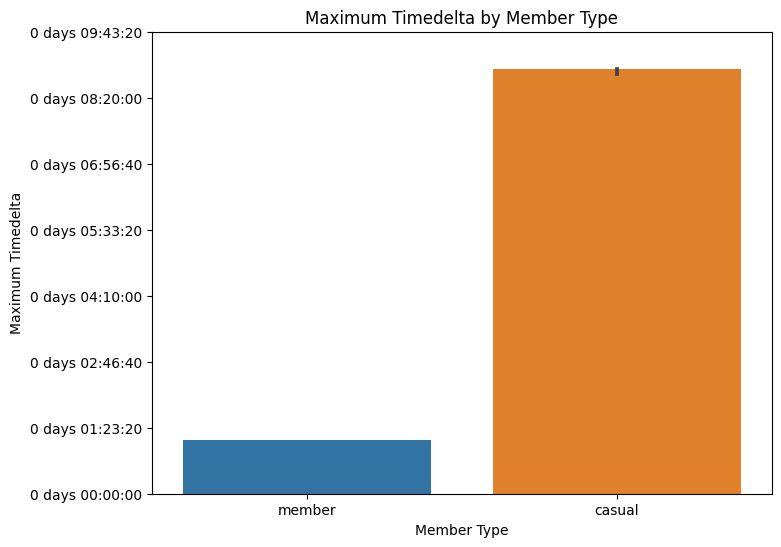

In [55]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='member_casual', y='time_difference_seconds', data=data_cleaned, estimator=max)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()

Much better. Much more coprehensive. The conclusion is the same as before, but the visualization if far better.

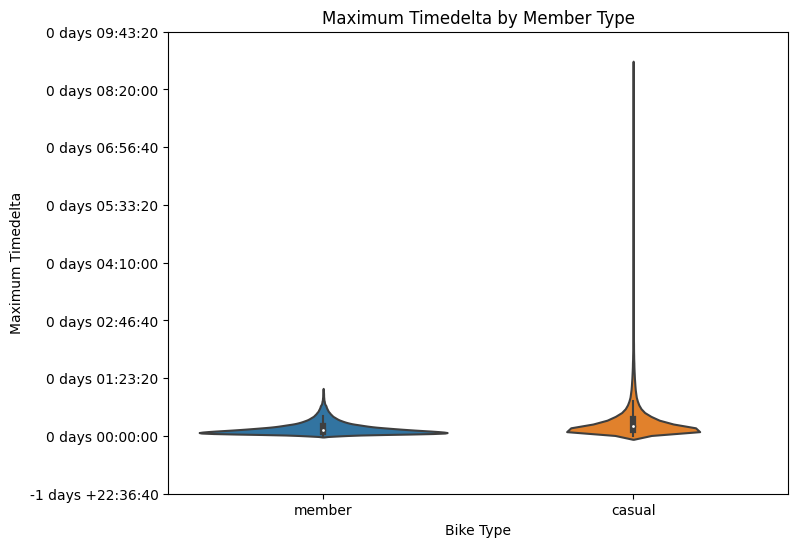

In [56]:
# Create a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x='member_casual', y='time_difference_seconds', data=data_cleaned)
plt.title('Maximum Timedelta by Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Maximum Timedelta')
yticks = plt.yticks()[0]
ytick_labels = [str(pd.Timedelta(seconds=seconds)) for seconds in yticks]
plt.yticks(yticks, ytick_labels)
plt.show()